epoch:0, train acc:0.08666666666666667, test acc:0.1229
epoch:1, train acc:0.13333333333333333, test acc:0.141
epoch:2, train acc:0.2, test acc:0.1858
epoch:3, train acc:0.23, test acc:0.2123
epoch:4, train acc:0.24, test acc:0.2305
epoch:5, train acc:0.2633333333333333, test acc:0.2343
epoch:6, train acc:0.2833333333333333, test acc:0.2474
epoch:7, train acc:0.31333333333333335, test acc:0.2569
epoch:8, train acc:0.3466666666666667, test acc:0.2707
epoch:9, train acc:0.36666666666666664, test acc:0.2855
epoch:10, train acc:0.37333333333333335, test acc:0.2882
epoch:11, train acc:0.41333333333333333, test acc:0.3081
epoch:12, train acc:0.43333333333333335, test acc:0.326
epoch:13, train acc:0.45, test acc:0.3354
epoch:14, train acc:0.46, test acc:0.3443
epoch:15, train acc:0.48, test acc:0.344
epoch:16, train acc:0.48, test acc:0.348
epoch:17, train acc:0.4766666666666667, test acc:0.3723
epoch:18, train acc:0.48333333333333334, test acc:0.3759
epoch:19, train acc:0.48333333333333334, 

epoch:160, train acc:0.8733333333333333, test acc:0.6915
epoch:161, train acc:0.8733333333333333, test acc:0.6987
epoch:162, train acc:0.8766666666666667, test acc:0.693
epoch:163, train acc:0.8733333333333333, test acc:0.6896
epoch:164, train acc:0.8633333333333333, test acc:0.6946
epoch:165, train acc:0.8633333333333333, test acc:0.6914
epoch:166, train acc:0.8733333333333333, test acc:0.699
epoch:167, train acc:0.8733333333333333, test acc:0.706
epoch:168, train acc:0.8766666666666667, test acc:0.7051
epoch:169, train acc:0.89, test acc:0.7112
epoch:170, train acc:0.8733333333333333, test acc:0.7006
epoch:171, train acc:0.8733333333333333, test acc:0.6995
epoch:172, train acc:0.87, test acc:0.7008
epoch:173, train acc:0.8733333333333333, test acc:0.7032
epoch:174, train acc:0.8766666666666667, test acc:0.7044
epoch:175, train acc:0.8766666666666667, test acc:0.703
epoch:176, train acc:0.87, test acc:0.7024
epoch:177, train acc:0.8766666666666667, test acc:0.6961
epoch:178, train acc

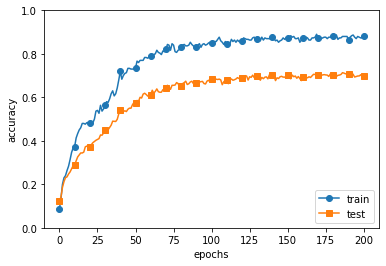

In [1]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（权值衰减）的设定 =======================
#weight_decay_lambda = 0 # 不使用权值衰减的情况
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()